In [77]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas
import os
import re
import pymongo
import json
from flask import Flask, jsonify, json
from flask_pymongo import PyMongo

DBS_NAME = os.getenv("DBS_NAME")
MONGO_URI = os.getenv("MONGODB_URI")

app = Flask(__name__)
app.config["DBS_NAME"] = "cookbook"
app.config["MONGO_URI"] = "mongodb://localhost:27017/cookbook"
mongo = PyMongo(app)

RECIPES_DATA_PATH = 'recipes.json'
cuisine_list = mongo.db.cuisine.find()

def read_json(file_path):
    results = []
    with open(RECIPES_DATA_PATH) as recipes_file:
        for recipes in recipes_file:
            try:
                recipe = json.loads(recipes)
                results.append(recipe)
            except ValueError:
                pass
        return results

def is_text_in_field(token, recipe_content):
    token = token.lower()
    recipe_content = ''.join(recipe_content).lower()
    match = re.search(token, recipe_content)
    if match:
        return True
    return False

results = read_json(RECIPES_DATA_PATH)

recipesDataFrame = pandas.DataFrame()
recipesDataFrame['cuisine'] = [recipe['cuisine'] for recipe in results]
for c in cuisine_list:
    recipesDataFrame[c['cuisine_name']] = recipesDataFrame['cuisine'].apply(lambda recipe: is_text_in_field(c['cuisine_name'], recipe))
# print(recipesDataFrame)


      cuisine  African  American  Asian  Australian  Brazilian  British  \
0      French    False     False  False       False      False    False   
1     Italian    False     False  False       False      False    False   
2     Italian    False     False  False       False      False    False   
3     Chinese    False     False  False       False      False    False   
4      French    False     False  False       False      False    False   
5     Chinese    False     False  False       False      False    False   
6     Chinese    False     False  False       False      False    False   
7     Chinese    False     False  False       False      False    False   
8     Chinese    False     False  False       False      False    False   
9     Chinese    False     False  False       False      False    False   
10    Chinese    False     False  False       False      False    False   
11    Chinese    False     False  False       False      False    False   
12    Chinese    False   

<IPython.core.display.Javascript object>


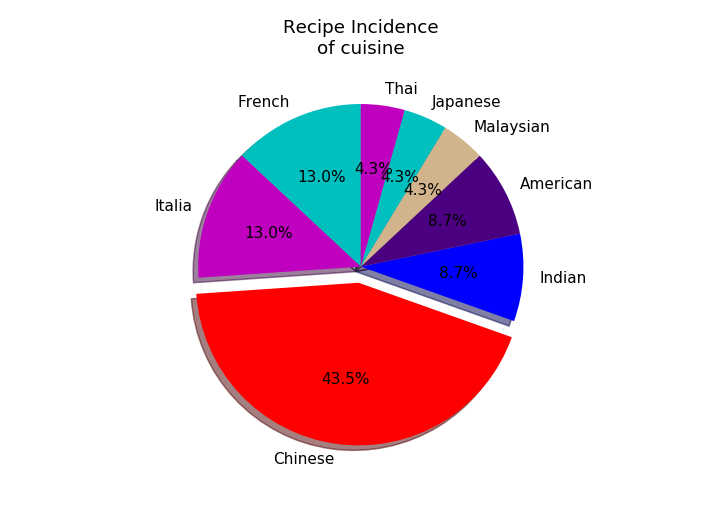

In [104]:
def cuisine_pie():
    slices = recipesDataFrame['French'].value_counts()[True],recipesDataFrame['Italian'].value_counts()[True],\
    recipesDataFrame['Chinese'].value_counts()[True],\
    recipesDataFrame['Indian'].value_counts()[True],recipesDataFrame['American'].value_counts()[True],\
    recipesDataFrame['Malaysian'].value_counts()[True],recipesDataFrame['Japanese'].value_counts()[True],\
    recipesDataFrame['Thai'].value_counts()[True]
    activities = ["French","Italia","Chinese","Indian","American","Malaysian","Japanese","Thai"]
    cols = ['c','m','r','b','indigo','tan']

    plt.pie(slices, colors=cols, labels=activities, 
            startangle=90, shadow=True, explode=(0,0,0.1,0,0,0,0,0), autopct='%1.1f%%')

    plt.title('Recipe Incidence\nof cuisine')
    plt.show()


cuisine_pie()